# Dog vs Cat Convolution Neural Network Classifier

In this Project, Convolution Neural Network(CNN) Classifier for Classifying dog and cat images is implemened. The Total number of images available for training and validation 25,000.
#### 

Dataset Link: https://www.microsoft.com/en-us/download/details.aspx?id=54765

Soruce: https://www.microsoft.com/en-us/download/details.aspx?id=54765

#### Test Train Split
Image training set contain 12500 images for each category. I split those into 80% train and 20% means test Split each class images into 10,000 for train and 2,500 for test. 


In [1]:
#Downloading the dataset from web link
#!wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"

In [2]:
#unzip the data
!unzip "content/kagglecatsanddogs_3367a.zip" -d "content"

Archive:  content/kagglecatsanddogs_3367a.zip
   creating: content/PetImages/Cat/
  inflating: content/PetImages/Cat/0.jpg  
  inflating: content/PetImages/Cat/1.jpg  
  inflating: content/PetImages/Cat/10.jpg  
  inflating: content/PetImages/Cat/100.jpg  
  inflating: content/PetImages/Cat/1000.jpg  
  inflating: content/PetImages/Cat/10000.jpg  
  inflating: content/PetImages/Cat/10001.jpg  
  inflating: content/PetImages/Cat/10002.jpg  
  inflating: content/PetImages/Cat/10003.jpg  
  inflating: content/PetImages/Cat/10004.jpg  
  inflating: content/PetImages/Cat/10005.jpg  
  inflating: content/PetImages/Cat/10006.jpg  
  inflating: content/PetImages/Cat/10007.jpg  
  inflating: content/PetImages/Cat/10008.jpg  
  inflating: content/PetImages/Cat/10009.jpg  
  inflating: content/PetImages/Cat/1001.jpg  
  inflating: content/PetImages/Cat/10010.jpg  
  inflating: content/PetImages/Cat/10011.jpg  
  inflating: content/PetImages/Cat/10012.jpg  
  inflating: content/PetImages/Cat/10013

In [3]:
#required libraries for processing images
import os
import matplotlib.pyplot as plt
import glob
import random
from shutil import copyfile

#This path should contains 2 folders (d0gs, cats) with images
SOURCE_PATH = 'content/PetImages/' # IT will be the extracted folder from zip

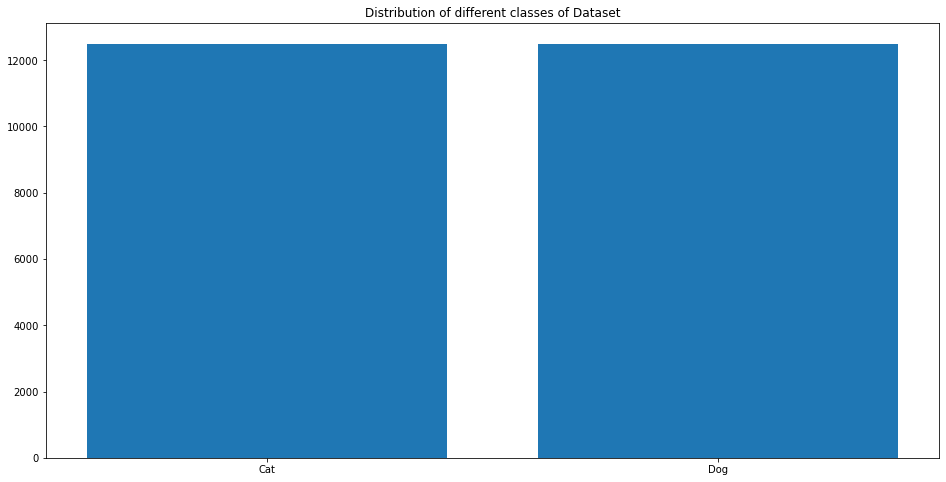

In [4]:
#Folder names should be like this in the above path or adjust accordingly.
image_folder = ['Cat', 'Dog']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir(SOURCE_PATH+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(16, 8))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes of Dataset')
plt.show()

In [5]:
#creating directories for splitting the data into training and testing
os.mkdir('model_data')

os.mkdir('model_data/train')
os.mkdir('model_data/test')

os.mkdir('model_data/train/Cat')
os.mkdir('model_data/train/Dog')

os.mkdir('model_data/test/Cat')
os.mkdir('model_data/test/Dog')

In [6]:
#function to split the data 
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)


In [7]:
#defining DIRS for cats/dogs 
CAT_SOURCE_DIR = SOURCE_PATH + 'Cat/'
TRAINING_CAT_DIR = 'model_data/train/Cat/'
VALID_CAT_DIR = 'model_data/test/Cat/'

DOG_SOURCE_DIR = SOURCE_PATH + 'Dog/'
TRAINING_DOG_DIR = 'model_data/train/Dog/'
VALID_DOG_DIR = 'model_data/test/Dog/'

In [8]:
#split the data into 80-20 percent as training and testing
split_size = .8
split_data(CAT_SOURCE_DIR, TRAINING_CAT_DIR, VALID_CAT_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOG_DIR, VALID_DOG_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [9]:
#printing total images for testing
for i in image_folder:
    print('Training {} images are: '.format(i)+str(len(os.listdir('model_data/train/'+i+'/')))) 

Training Cat images are: 10000
Training Dog images are: 10000


In [10]:
#printing total images for training
for i in image_folder:
    print('Test {} images are: '.format(i)+str(len(os.listdir('model_data/test/'+i+'/')))) 

Test Cat images are: 2500
Test Dog images are: 2500


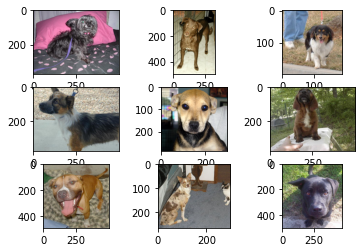

In [11]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = "content/PetImages/Dog/"
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

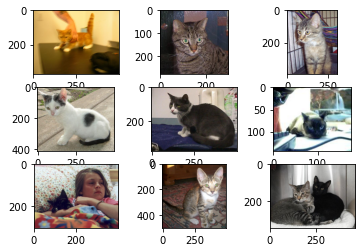

In [12]:
# define location of dataset
folder = "content/PetImages/Cat/"
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## **CNN MODEL**

In [13]:
#importing libraries for CNN model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [14]:
from warnings import filterwarnings
filterwarnings('ignore')

Network Parameter:
* Rectifier Linear Unit 
* Adam optimizer
* Sigmoid on Final output
* Binary CrossEntropy loss

In [15]:
#Architecture for our CNN model
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=2,activation='softmax'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

2022-05-05 19:57:51.418419: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-05 19:57:51.418698: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


## Data Augmentation
Using some Data Augmentation techniques (generate more data) for more data and Better results.
* Shearing of images
* Random zoom
* Horizontal flips

In [16]:
train_dir = 'model_data/train' # Path to train directory
test_dir = 'model_data/test' # Path to validation directory

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory(train_dir,
                                             target_size=(128,128),
                                             batch_size=32,
                                             class_mode='categorical')
#Validation Set
test_set = test_datagen.flow_from_directory(test_dir,
                                           target_size=(128,128),
                                           batch_size = 32,
                                           class_mode='categorical',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory(test_dir,
                                           target_size=(128,128),
                                            batch_size=32,
                                            shuffle=False)



Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [18]:
##capture
classifier.fit(train_set, steps_per_epoch=150,epochs=50,validation_data=test_set)


# classifier.fit_generator(train_set,
#                         steps_per_epoch=100, 
#                         epochs = 200,
#                         validation_data = test_set,
#                         #validation_steps = 20, 
#                         verbose =1,
#                         #callbacks=[tensorboard]
#                         );

classifier.save('content/model_data/dogcat_model_bak.h5')

Epoch 1/50


2022-05-05 19:57:53.293982: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-05 19:57:53.591005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - ETA: 0s - loss: 0.7118 - accuracy: 0.5825

2022-05-05 19:58:13.533800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - 28s 165ms/step - loss: 0.7118 - accuracy: 0.5825 - val_loss: 0.6630 - val_accuracy: 0.6470
Epoch 2/50
150/150 [==============================] - 26s 171ms/step - loss: 0.6413 - accuracy: 0.6429 - val_loss: 0.6099 - val_accuracy: 0.6752
Epoch 3/50
150/150 [==============================] - 23s 156ms/step - loss: 0.6018 - accuracy: 0.6863 - val_loss: 0.5712 - val_accuracy: 0.7060
Epoch 4/50
150/150 [==============================] - 25s 167ms/step - loss: 0.5606 - accuracy: 0.7115 - val_loss: 0.5688 - val_accuracy: 0.7104
Epoch 5/50
150/150 [==============================] - 24s 159ms/step - loss: 0.5512 - accuracy: 0.7192 - val_loss: 0.5320 - val_accuracy: 0.7336
Epoch 6/50
150/150 [==============================] - 22s 147ms/step - loss: 0.5139 - accuracy: 0.7454 - val_loss: 0.5422 - val_accuracy: 0.7352
Epoch 7/50
150/150 [==============================] - 22s 149ms/step - loss: 0.5076 - accuracy: 0.7490 - val_loss: 0.5725 - val_accuracy: 0.7

In [30]:
from tensorflow.keras.models import load_model
classifier = load_model('content/model_data/dogcat_model_bak.h5')

### Prediction of Single Image

[[0.9566924 0.0433076]]


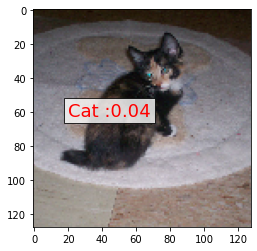

In [43]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('model_data/train/Cat/10050.jpg', target_size=(128, 128))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
print(prediction)
if(prediction[:,1]>0.6):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
elif(prediction[:,0]>0.6):
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='None'
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()


IndexError: list index out of range

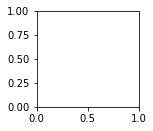

In [68]:
# for generator image set u can use 

fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('model_data/test/'+test_set1.filenames[np.random.choice(range(12500))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)


In [53]:
%%
# Model Accuracy
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

UsageError: Cell magic `%%` not found.


In [ ]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))